## 서울특별시, 714309
## 데이터 전처리
1. 필요없는 컬럼 빼기
2. region_sub 컬럼 원핫인코딩 형식 수정
3. 컬럼별 상관관계 파악 컬럼 제거
4. price_cat 컬럼 추가

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

region_name = 'so_region'

In [2]:
readD = pd.read_csv(f'region-data-files/{region_name}.csv')
readD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714309 entries, 0 to 714308
Columns: 105 entries, region to all_loan
dtypes: float64(72), int64(26), object(7)
memory usage: 572.2+ MB


In [3]:
all_col = {
    'region', 'region_sub', 'apt_name', 'apt_size', 'apt_floor', 'contract_date', 'contract_price',
    'completion_year', 'period_completed', 'pyung', 'price_per_pyung', 'contract_year', 'value_year',
    'value_factor', 'price_per_pyung_present', 'contract_date_key', 'index',  'date_ym', 'kospi',
    'kospi200', 'kospi200construct', 'kosdaq', 'dowjones', 's&p500', 'shanghai', 'nikkei',
    'exchange_rate', 'gold', 'oil', 'export', 'import', 'cpi_living', 'cpi', 'ccsi',
    'loan_interest_rate', 'housing_loan_rate',
    
    'gw_ratio', 'gg_ratio', 'gsn_ratio', 'gsb_ratio', 'gj_ratio', 'dg_ratio', 'dj_ratio',
    'bs_ratio', 'so_ratio', 'sj_ratio', 'us_ratio', 'ic_ratio', 'jrn_ratio', 'jrb_ratio',
    'jj_ratio', 'ccn_ratio', 'ccb_ratio', 'all_ratio',
    
    'gw_pop', 'gg_pop', 'gsn_pop', 'gsb_pop', 'gj_pop', 'dg_pop', 'dj_pop', 'bs_pop',
    'so_pop', 'sj_pop', 'us_pop', 'ic_pop', 'jrn_pop', 'jrb_pop', 'jj_pop', 'ccn_pop', 'ccb_pop',
    
    'all_re_ccsi', 'so_re_ccsi', 'ic_re_ccsi', 'gg_re_ccsi', 'bs_re_ccsi', 'dg_re_ccsi',
    'gj_re_ccsi', 'dj_re_ccsi', 'us_re_ccsi', 'gw_re_ccsi', 'ccb_re_ccsi', 'ccn_re_ccsi',
    'jrb_re_ccsi', 'jrn_re_ccsi', 'gsb_re_ccsi', 'gsn_re_ccsi',
    
    'gw_loan', 'gg_loan', 'gsn_loan', 'gsb_loan', 'gj_loan', 'dg_loan', 'dj_loan',
    'bs_loan', 'so_loan', 'sj_loan', 'us_loan', 'ic_loan', 'jrn_loan', 'jrb_loan',
    'jj_loan', 'ccn_loan', 'ccb_loan', 'all_loan'
}

In [4]:
drop_col_1 = {
    'region', 'apt_name', 'apt_size', 'contract_date', 'contract_price',
    'completion_year', 'price_per_pyung', 'contract_year', 'value_year',
    'value_factor', 'contract_date_key', 'index', 'date_ym', 'kospi',
    's&p500', 'nikkei', 'cpi', 'ccsi', 'housing_loan_rate',
    
     'gw_ratio', 'gg_ratio', 'gsn_ratio', 'gsb_ratio', 'gj_ratio', 'dg_ratio', 'dj_ratio',
    'bs_ratio', 'so_ratio', 'sj_ratio', 'us_ratio', 'ic_ratio', 'jrn_ratio', 'jrb_ratio',
    'jj_ratio', 'ccn_ratio', 'ccb_ratio', 'all_ratio',
    
    'gw_pop', 'gsn_pop', 'gsb_pop', 'gj_pop', 'dg_pop', 'dj_pop', 'bs_pop',
    'us_pop', 'ic_pop', 'jrn_pop', 'jrb_pop', 'jj_pop', 'ccn_pop', 'ccb_pop',
    
    'all_re_ccsi', 'ic_re_ccsi', 'gg_re_ccsi', 'bs_re_ccsi', 'dg_re_ccsi',
    'gj_re_ccsi', 'dj_re_ccsi', 'us_re_ccsi', 'gw_re_ccsi', 'ccb_re_ccsi', 'ccn_re_ccsi',
    'jrb_re_ccsi', 'jrn_re_ccsi', 'gsb_re_ccsi', 'gsn_re_ccsi',
    
    'gw_loan', 'gg_loan', 'gsn_loan', 'gsb_loan', 'gj_loan', 'dg_loan', 'dj_loan',
    'bs_loan', 'sj_loan', 'us_loan', 'ic_loan', 'jrn_loan', 'jrb_loan',
    'jj_loan', 'ccn_loan', 'ccb_loan', 'all_loan'
}

In [5]:
preD = readD.drop(columns=drop_col_1)
preD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714309 entries, 0 to 714308
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   region_sub               714309 non-null  object 
 1   apt_floor                714309 non-null  int64  
 2   period_completed         714309 non-null  int64  
 3   pyung                    714309 non-null  float64
 4   price_per_pyung_present  714309 non-null  float64
 5   kospi200                 714309 non-null  float64
 6   kospi200construct        714309 non-null  float64
 7   kosdaq                   714309 non-null  float64
 8   dowjones                 714309 non-null  float64
 9   shanghai                 714309 non-null  float64
 10  exchange_rate            714309 non-null  float64
 11  gold                     714309 non-null  float64
 12  oil                      714309 non-null  float64
 13  export                   714309 non-null  int64  
 14  impo

In [6]:
# test = preD['region_sub'].str.split(expand=True)[0]
# test.value_counts()

preD['region_sub'] = preD['region_sub'].str.split(expand=True)[0]
preD['region_sub'].value_counts()

노원구     72112
송파구     48562
강서구     43353
강남구     43040
강동구     37854
성북구     37588
구로구     36758
양천구     34089
서초구     32305
도봉구     31799
영등포구    30063
동작구     27470
성동구     26891
마포구     26149
동대문구    25435
은평구     24100
중랑구     23288
관악구     23028
서대문구    21200
강북구     14393
광진구     14227
용산구     13704
금천구     12396
중구       8889
종로구      5616
Name: region_sub, dtype: int64

In [7]:
# drop_col_2 = {
#     'dg_ratio', 'dg_pop'
# }

# preD.drop(columns=drop_col_2, inplace=True)
# preD.info()

In [8]:
corr_matrix = preD.corr()
corr_matrix["price_per_pyung_present"].sort_values(ascending=False)

price_per_pyung_present    1.000000
so_loan                    0.365299
gg_pop                     0.362999
sj_pop                     0.350787
dowjones                   0.346761
cpi_living                 0.343682
exchange_rate              0.222019
gold                       0.172937
kosdaq                     0.162551
kospi200                   0.160347
apt_floor                  0.105497
shanghai                   0.060499
period_completed           0.052065
pyung                      0.022437
import                     0.016173
export                    -0.037018
so_re_ccsi                -0.107073
oil                       -0.172684
loan_interest_rate        -0.198581
kospi200construct         -0.269571
so_pop                    -0.359485
Name: price_per_pyung_present, dtype: float64

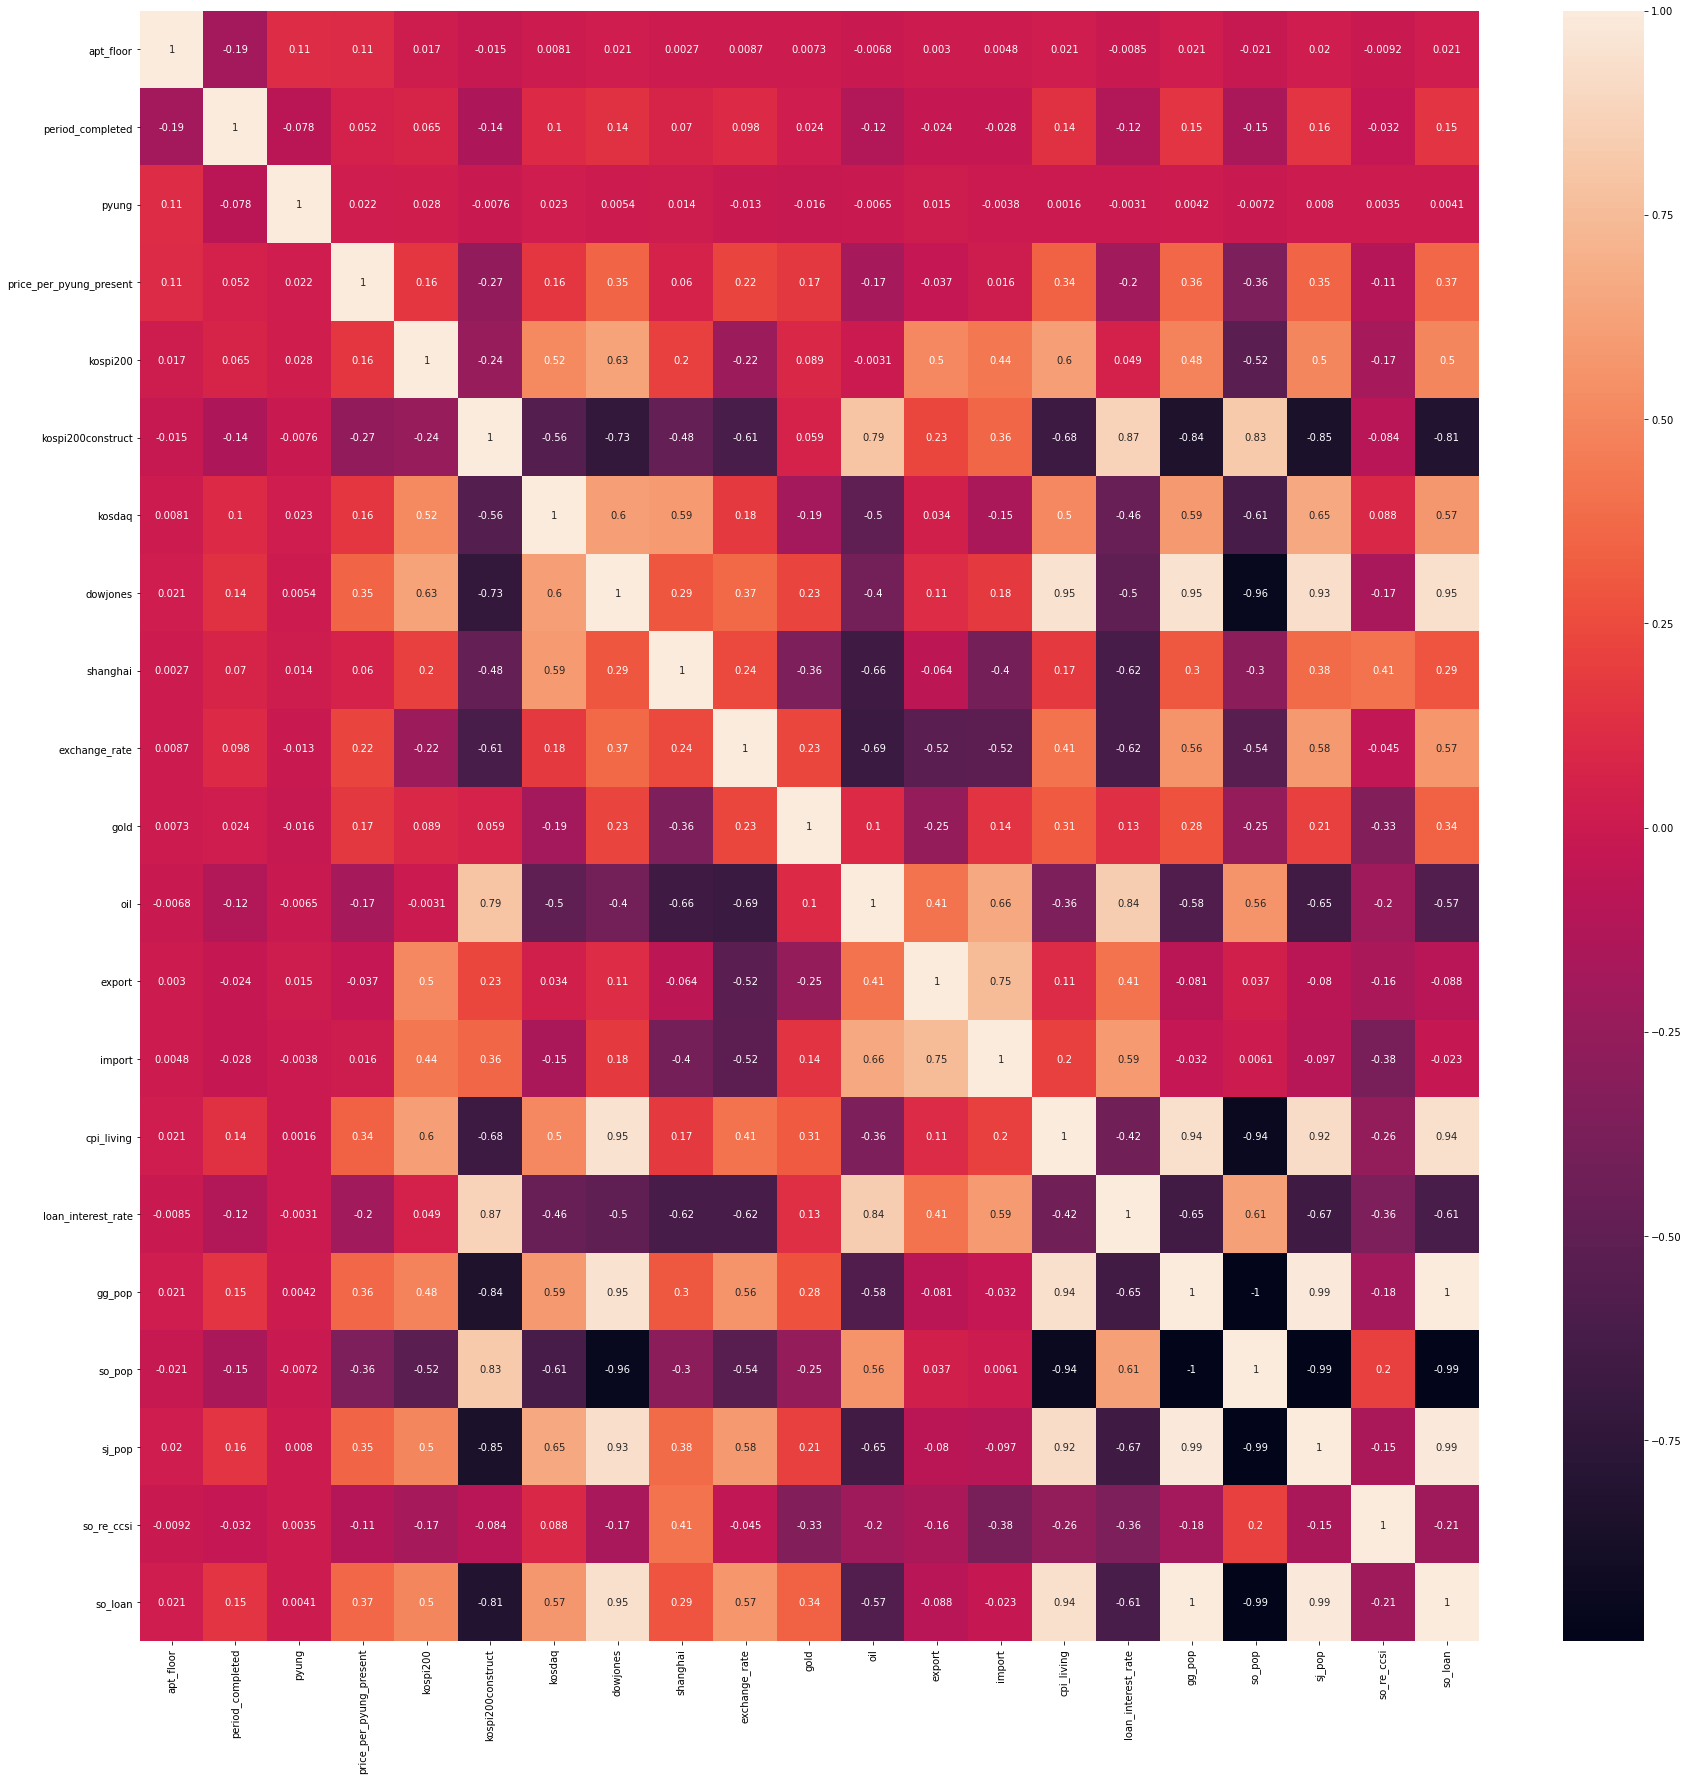

In [9]:
import seaborn as sns

plt.figure(figsize=(30,30))
sns.heatmap(corr_matrix, annot=True)
plt.show()


count    7.143090e+05
mean     2.489558e+07
std      1.306514e+07
min      2.852160e+05
25%      1.627054e+07
50%      2.109821e+07
75%      2.933014e+07
max      2.299972e+08
Name: price_per_pyung_present, dtype: float64


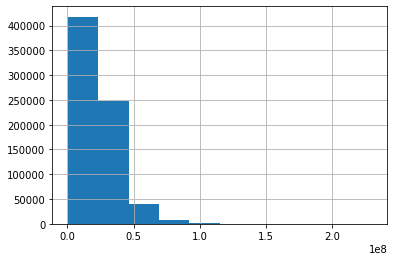

In [10]:
print(preD['price_per_pyung_present'].describe())

preD['price_per_pyung_present'].hist()
plt.show()

In [11]:
preD['price_cat'] = preD['price_per_pyung_present'] / 2.852160e+05  # min
print(preD['price_cat'].describe())

count    714309.000000
mean         87.286767
std          45.807878
min           1.000000
25%          57.046361
50%          73.972736
75%         102.834851
max         806.396598
Name: price_cat, dtype: float64


In [12]:
def calc_price_categorize(D):

    if D['price_cat'] < 57.046361 : # 25%
        D['price_cat'] = 1.0
    elif D['price_cat'] < 73.972736 : # 50%
        D['price_cat'] = 2.0
    elif D['price_cat'] < 102.834851 : # 75%
        D['price_cat'] = 3.0
    else:
        D['price_cat'] = 4.0

    return D
    
preD = preD.apply(calc_price_categorize, axis=1)
preD['price_cat'].value_counts()

2.0    178586
3.0    178579
4.0    178578
1.0    178566
Name: price_cat, dtype: int64

In [13]:
preD.to_csv(f'region-ml-data-files/{region_name}.csv', index=False, encoding='utf-8-sig')

## 기계 학습
1. price_cat 분포별 데이터 나누기
2. train_set, test_set 나누기
3. 스케일 조정
4. 모델별 학습, 테스트
5. 모델 최적화

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

region_name = 'so_region'

In [2]:
readD = pd.read_csv(f'region-ml-data-files/{region_name}.csv')
readD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714309 entries, 0 to 714308
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   region_sub               714309 non-null  object 
 1   apt_floor                714309 non-null  int64  
 2   period_completed         714309 non-null  int64  
 3   pyung                    714309 non-null  float64
 4   price_per_pyung_present  714309 non-null  float64
 5   kospi200                 714309 non-null  float64
 6   kospi200construct        714309 non-null  float64
 7   kosdaq                   714309 non-null  float64
 8   dowjones                 714309 non-null  float64
 9   shanghai                 714309 non-null  float64
 10  exchange_rate            714309 non-null  float64
 11  gold                     714309 non-null  float64
 12  oil                      714309 non-null  float64
 13  export                   714309 non-null  int64  
 14  impo

In [3]:
from sklearn.model_selection import StratifiedShuffleSplit

sample = StratifiedShuffleSplit(n_splits=1, test_size=0.4, random_state=37)
for sample1_idx, sample2_idx in sample.split(readD, readD["price_cat"]): # readD['price_cat'] 분포 유지
    sample1_set = readD.loc[sample1_idx]
    sample2_set = readD.loc[sample2_idx]

sample1_set.reset_index(drop=True, inplace=True)
sample2_set.reset_index(drop=True, inplace=True)

split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
for train_idx, test_idx in split.split(sample1_set, sample1_set["price_cat"]):
    train_set = sample1_set.loc[train_idx]
    test_set = sample1_set.loc[test_idx]

len(sample1_set), len(train_set), len(test_set)

(428585, 300009, 128576)

In [4]:
train_set['price_cat'].value_counts() / len(train_set)

2.0    0.250009
3.0    0.250002
4.0    0.250002
1.0    0.249986
Name: price_cat, dtype: float64

In [5]:
for set_ in (train_set, test_set):
    set_.drop('price_cat', axis=1, inplace=True)

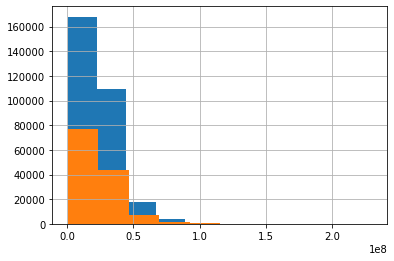

In [6]:
train_set['price_per_pyung_present'].hist()
test_set['price_per_pyung_present'].hist()
plt.show()

In [7]:
x_train = train_set.drop('price_per_pyung_present', axis=1)
y_train = train_set['price_per_pyung_present'].copy()
x_test =  test_set.drop('price_per_pyung_present', axis=1)
y_test = test_set['price_per_pyung_present'].copy()

In [8]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    
    def fit(self, x, y=None):
        return self
    
    def transform(self, x):
        return x[self.attribute_names].values

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import GradientBoostingRegressor

num_pipe = Pipeline([
        ('selector', DataFrameSelector(list(x_train)[1:])),
        ('std_scaler', StandardScaler())
    ])

cat_pipe = Pipeline([
        ('selector', DataFrameSelector(['region_sub'])),
        ('cat_encoder', OneHotEncoder(sparse=False))
    ])

prepro_pipe = FeatureUnion([
        ("num_pipe", num_pipe),
        ("cat_pipe", cat_pipe)
    ])

full_pipe = Pipeline([
        ('prepro', prepro_pipe),
        ("gbr", GradientBoostingRegressor())
    ])

x_train_nor = prepro_pipe.fit_transform(x_train)
# x_test_nor = prepro_pipe.fit_transform(x_test)


In [10]:
x_train_nor[1, :]


array([-0.65611246, -0.11097631,  0.21825798, -1.03730107, -0.56175685,
        0.48863454, -0.54844532, -0.03483932,  1.29797021, -0.64070331,
       -0.61924204, -1.37370537, -1.58901833, -0.65288673, -0.68585418,
       -0.15850941,  0.14728783,  0.01958438,  0.48183356, -0.18463598,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ])

In [11]:
from sklearn.model_selection import GridSearchCV

param_grid = {'gbr__n_estimators': [1100],
              'gbr__max_depth': [8]}

grid = GridSearchCV(full_pipe, param_grid=param_grid, cv=2)
grid.fit(x_train, y_train)

print("최상의 교차 검증 정확도: ", grid.best_score_)
print("테스트 세트 점수: ", grid.score(x_test, y_test))
print("최적의 매개변수: {}".format(grid.best_params_))

최상의 교차 검증 정확도:  0.9173022362103753
테스트 세트 점수:  0.9291856786906987
최적의 매개변수: {'gbr__max_depth': 8, 'gbr__n_estimators': 1100}


In [12]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

test_pred = grid.predict(x_test)
grid_mse = mean_squared_error(y_test, test_pred)
grid_rmse = np.sqrt(grid_mse)
print('grid rmse: ', grid_rmse)

grid_mae = mean_absolute_error(y_test, test_pred)
print('grid mae: ', grid_mae)

grid rmse:  3472115.8270312333
grid mae:  2186054.8171918495


In [13]:
grid.cv_results_

{'mean_fit_time': array([1286.0560354]),
 'std_fit_time': array([5.94611681]),
 'mean_score_time': array([4.89840579]),
 'std_score_time': array([0.00448895]),
 'param_gbr__max_depth': masked_array(data=[8],
              mask=[False],
        fill_value='?',
             dtype=object),
 'param_gbr__n_estimators': masked_array(data=[1100],
              mask=[False],
        fill_value='?',
             dtype=object),
 'params': [{'gbr__max_depth': 8, 'gbr__n_estimators': 1100}],
 'split0_test_score': array([0.9165674]),
 'split1_test_score': array([0.91803707]),
 'mean_test_score': array([0.91730224]),
 'std_test_score': array([0.00073483]),
 'rank_test_score': array([1])}

In [14]:
final_model = grid.best_estimator_
final_model

Pipeline(steps=[('prepro',
                 FeatureUnion(transformer_list=[('num_pipe',
                                                 Pipeline(steps=[('selector',
                                                                  DataFrameSelector(attribute_names=['apt_floor',
                                                                                                     'period_completed',
                                                                                                     'pyung',
                                                                                                     'kospi200',
                                                                                                     'kospi200construct',
                                                                                                     'kosdaq',
                                                                                                     'dowjones',
                              

In [15]:
import joblib

joblib.dump(final_model, f'models/{region_name}.pkl')


['models/so_region.pkl']

In [16]:
# test model
import joblib

gw_model = joblib.load(f'models/{region_name}.pkl')

test_pred = gw_model.predict(x_test)
grid_mse = mean_squared_error(y_test, test_pred)
grid_rmse = np.sqrt(grid_mse)
print('grid rmse: ', grid_rmse)

grid rmse:  3472115.8270312333


## 모델 프로토 타입

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

region_name = 'so_region'
readD = pd.read_csv(f'region-ml-data-files/{region_name}.csv')

test = readD.tail(1)
test = test.drop(['price_per_pyung_present', 'price_cat'], axis=1)
test['region_sub'] = readD['region_sub'].value_counts().index[0]
test['apt_floor'] = 12
test['period_completed'] = 0
test['pyung'] = 25.72
test.to_dict('records')

[{'region_sub': '노원구',
  'apt_floor': 12,
  'period_completed': 1,
  'pyung': 25.72,
  'gg_ratio': 1.14,
  'sj_ratio': 1.31,
  'kospi200': 280.09,
  'kospi200construct': 189.47,
  'kosdaq': 737.97,
  'dowjones': 25812.88,
  'shanghai': 2984.67,
  'exchange_rate': 1199.0,
  'gold': 1793.6,
  'oil': 39.84,
  'export': 39229801,
  'import': 35597740,
  'cpi_living': 104.88,
  'loan_interest_rate': 2.67,
  'gg_pop': 13351891,
  'so_pop': 9715429,
  'sj_pop': 346217,
  'so_re_ccsi': 131.9,
  'so_loan': 336897.1}]

In [45]:
default_so = [{
    'region_sub': '노원구', 'apt_floor': 12, 'period_completed': 0, 'pyung': 25.72,
    'gg_ratio': 1.14, 'sj_ratio': 1.31, 'kospi200': 280.09, 'kospi200construct': 189.47,
    'kosdaq': 737.97, 'dowjones': 25812.88, 'shanghai': 2984.67, 'exchange_rate': 1199.0,
    'gold': 1793.6, 'oil': 39.84, 'export': 39229801, 'import': 35597740, 'cpi_living': 104.88,
    'loan_interest_rate': 2.67, 'gg_pop': 13351891, 'so_pop': 9715429, 'sj_pop': 346217,
    'so_re_ccsi': 131.9, 'so_loan': 336897.1
}]

predD = pd.DataFrame.from_records(default_so)


from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    
    def fit(self, x, y=None):
        return self
    
    def transform(self, x):
        return x[self.attribute_names].values


import joblib

so_model = joblib.load(f'models/{region_name}.pkl')

test_pred = so_model.predict(predD)
test_pred


array([15004172.44406838])